In [1]:
# import tweepy

# # Set up Twitter API credentials
# consumer_key = 'your_consumer_key'
# consumer_secret = 'your_consumer_secret'
# access_token = 'your_access_token'
# access_token_secret = 'your_access_token_secret'

# # Authenticate with Twitter API
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth)

# # Specify the username of the target user
# target_user = 'target_username'

# # Collect tweets from the target user
# tweets = api.user_timeline(screen_name=target_user, count=200, tweet_mode='extended')

# # Print the text of each tweet
# for tweet in tweets:
#     print(tweet.full_text)


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('rawdata.csv')


In [4]:
df.shape

(3060, 4)

In [5]:
df.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    3060 non-null   object
 1   Retweets  3060 non-null   int64 
 2   Likes     3060 non-null   int64 
 3   Date      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


In [7]:
df.columns

Index(['Tweets', 'Retweets', 'Likes', 'Date'], dtype='object')

In [8]:
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    
  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt


In [9]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleantwt)

In [10]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!


In [11]:
df.drop(df[df['Cleaned_Tweets'] == ''].index, inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [14]:
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [15]:
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [16]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [17]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,Positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,Positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,Neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,Positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,Neutral


In [18]:
df.tail()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just that manganese is an alternative to iron ...,0.000,0.00,Neutral
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly,0.250,0.25,Positive
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies are directly responsible for the...,0.545,0.18,Positive
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You should be voted out of office,0.000,0.00,Neutral
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09,CB radios are free from govt/media control,0.800,0.40,Positive


In [19]:
df.describe

<bound method NDFrame.describe of                                                  Tweets  Retweets    Likes  \
0                                 @PeterSchiff 🤣 thanks       209     7021   
1                                 @ZubyMusic Absolutely       755    26737   
2      Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927   356623   
4        Meeting a lot of cool people at Twitter today!      9366   195546   
5     Entering Twitter HQ – let that sink in! https:...    145520  1043592   
...                                                 ...       ...      ...   
3055  @LimitingThe @baglino Just that manganese is a...       171     3173   
3056              @incentives101 @ICRicardoLara Exactly       145     4234   
3057  @ICRicardoLara Your policies are directly resp...       421     6144   
3058   @ICRicardoLara You should be voted out of office       484     7029   
3059         CB radios are free from govt/media control     11302   113429   

                     Date    

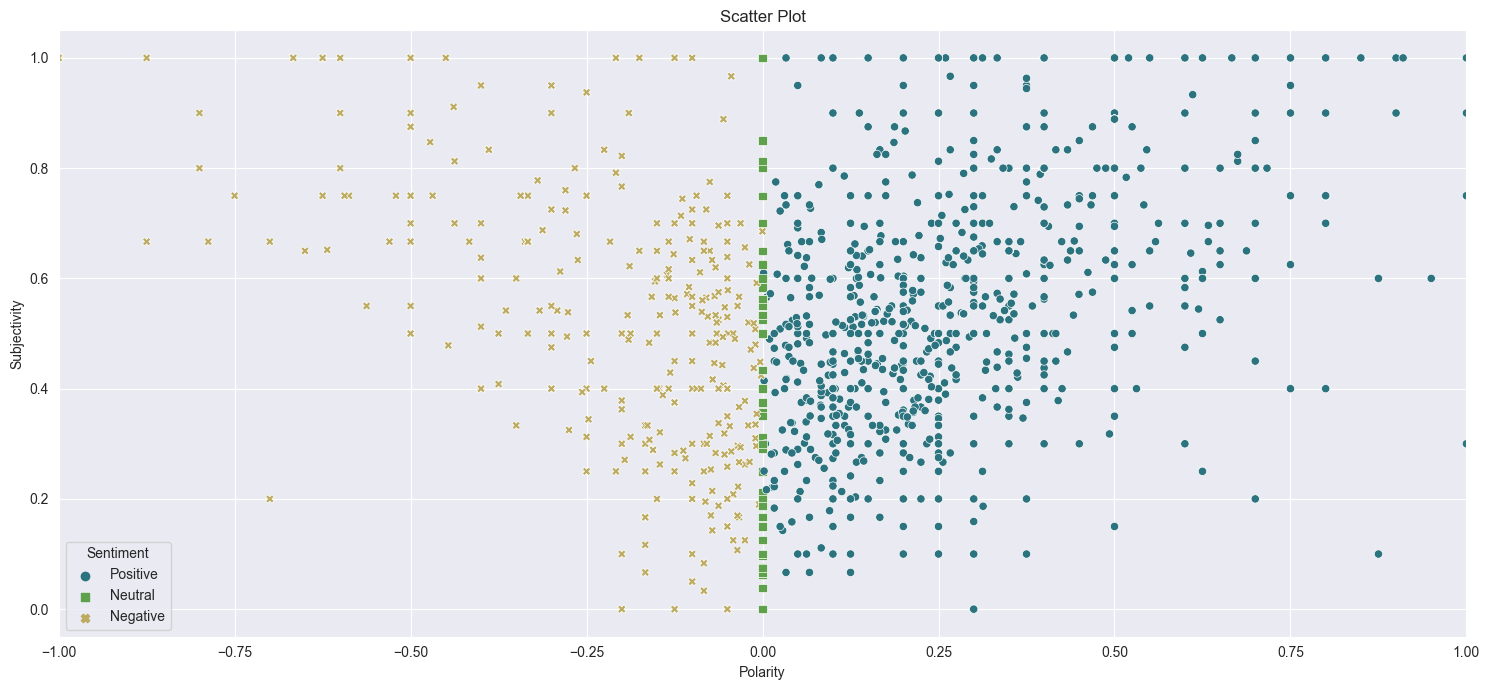

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,7))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

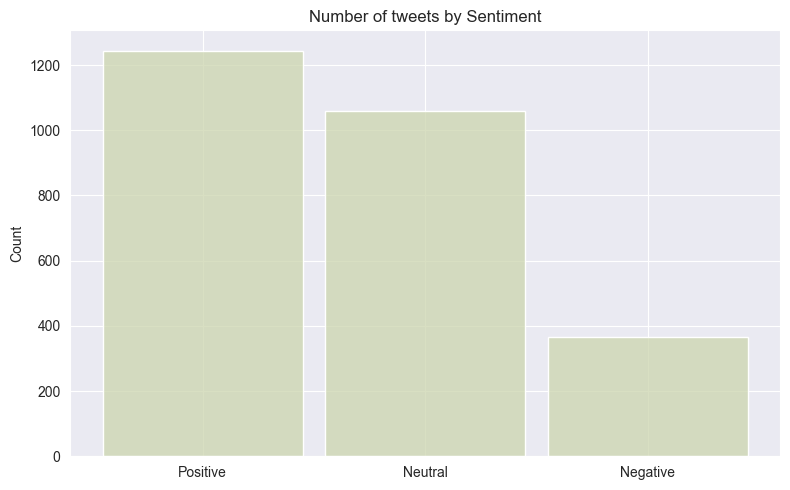

In [21]:
plt.figure(figsize = (8,5))

sns.histplot(df, x = 'Sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

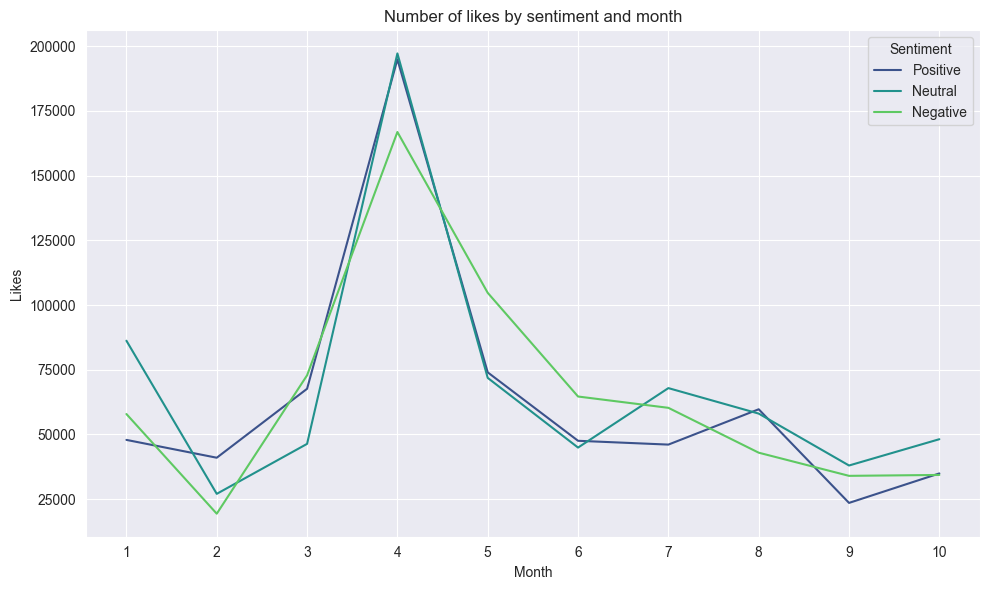

In [22]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Creating a plot to show number of likes depending on sentiment through time

plt.figure(figsize = (10, 6))

months = df['Month'].unique()

sns.lineplot(x = 'Month', y = 'Likes', hue = 'Sentiment', ci = None, data = df, palette = 'viridis')
plt.title('Number of likes by sentiment and month')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()


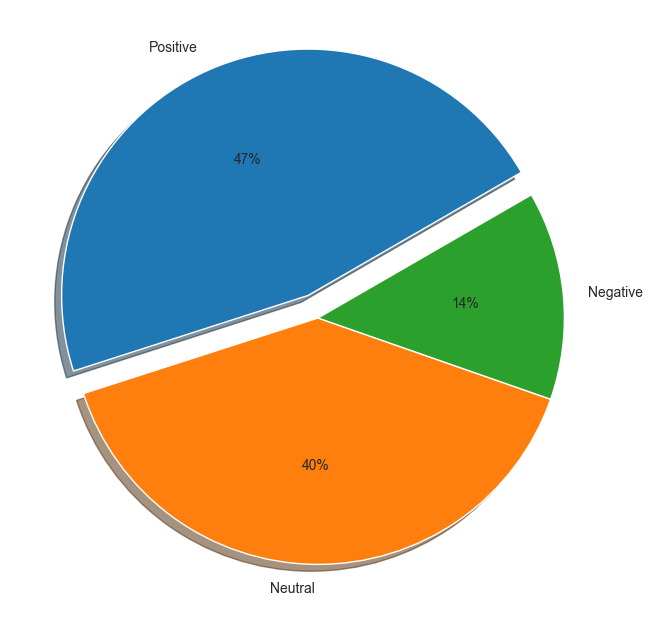

In [23]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,8))

values=df['Sentiment'].value_counts()
label=['Positive','Neutral','Negative']
explode=[0.1,0,0]

plt.pie(values,labels=label,explode=explode,autopct='%.0f%%',shadow=True,startangle=30)
plt.show()

(-0.5, 1599.5, 799.5, -0.5)

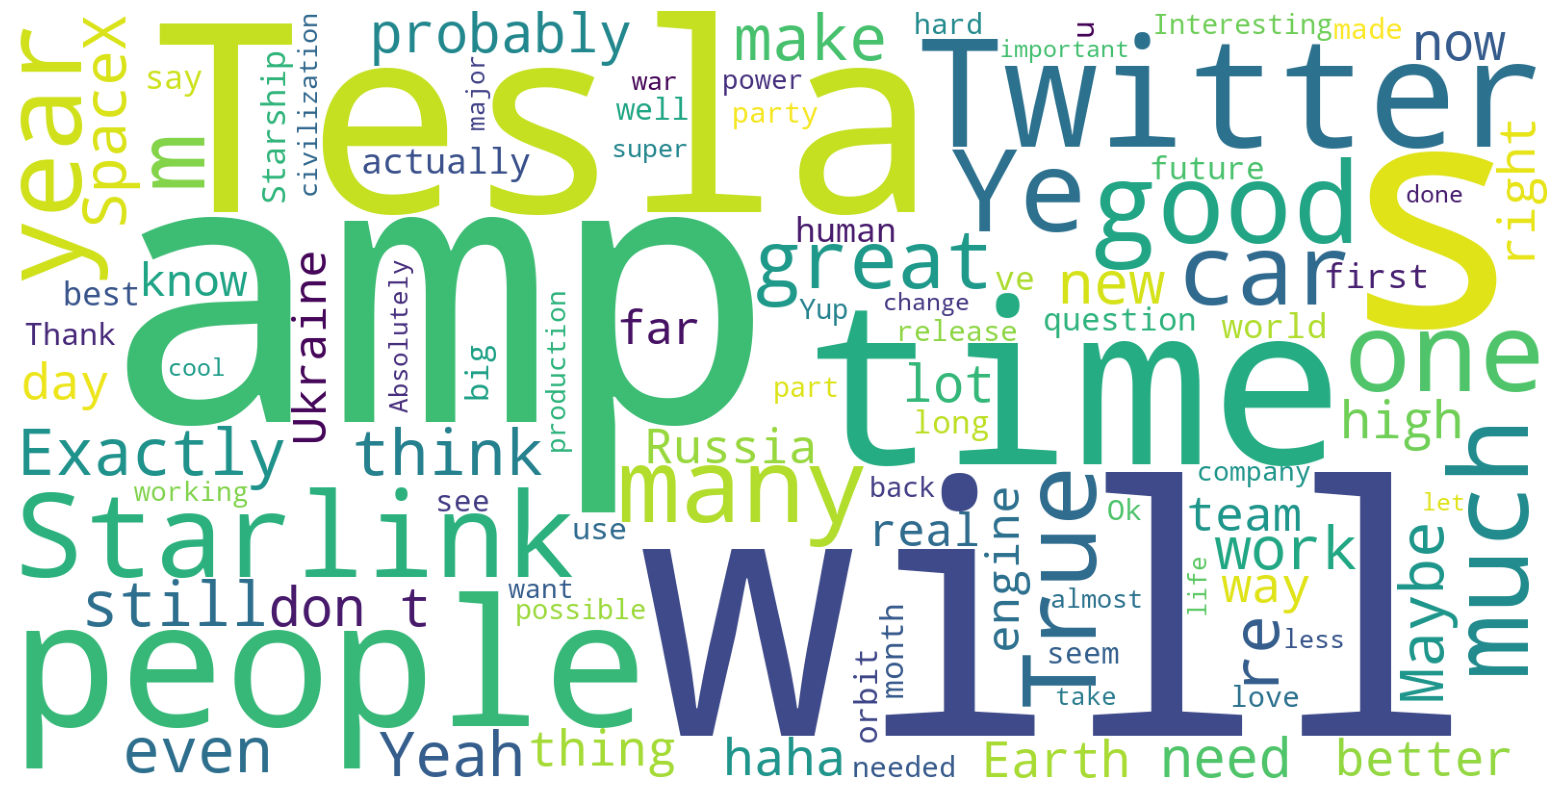

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#generate a word cloud image of tweets
text = " ".join(tweet for tweet in df['Cleaned_Tweets'])
wordcloud = WordCloud(width = 1600, height = 800, max_words=100, background_color="white").generate(text)

#display the generated image
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")

In [25]:
corpus = [tweet for tweet in df['Cleaned_Tweets']]
len(corpus) #counting the number of tweets

2668

Text(0, 0.5, 'Frequency')

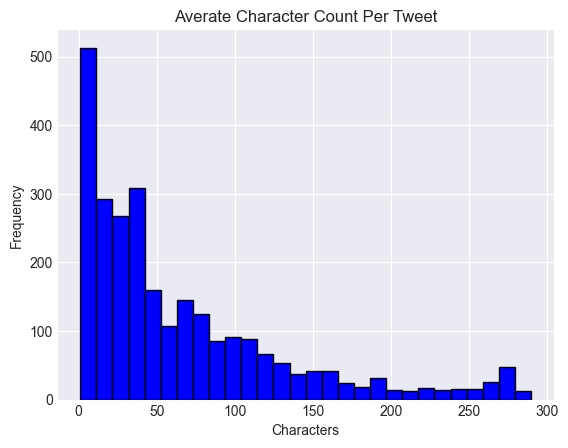

In [26]:
word_count = [len(tweet) for tweet in corpus]

# matplotlib histogram
plt.hist(word_count, color = 'blue', edgecolor = 'black',
         bins = int(280/10))

# Add labels
plt.title('Averate Character Count Per Tweet')
plt.xlabel('Characters')
plt.ylabel('Frequency')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


Text(0, 0.5, 'Frequency')

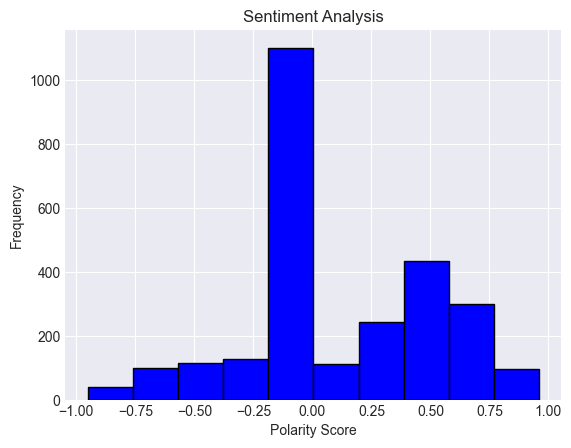

In [27]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sentiment = [sid.polarity_scores(tweet)['compound'] for tweet in corpus]

# matplotlib histogram
plt.hist(sentiment, color = 'blue', edgecolor = 'black')
# Add labels
plt.title('Sentiment Analysis')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

In [ ]:
import gpt_2_simple as gpt2

#downloading the gpt-2 model that was trained using 124 million parameters
gpt2.download_gpt2(model_name="124M")

#saving the corpus as text file
file = open('tweet.txt', 'w', encoding='utf-8')
file.write('\n'.join(corpus))
file.close()

#starting the gpt2 tensorflow session
sess = gpt2.start_tf_sess()

#finetuning
gpt2.finetune(sess,
              dataset='tweet.txt',
              model_name='124M',
              steps=1000,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=500,
              save_every=100
              )

Fetching checkpoint: 1.05Mit [00:00, ?it/s]                                                         
Fetching encoder.json: 1.05Mit [00:04, 253kit/s]                                                    
Fetching hparams.json: 1.05Mit [00:00, ?it/s]                                                       
Fetching model.ckpt.data-00000-of-00001: 498Mit [06:38, 1.25Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 77.3Mit/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:03, 340kit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:02, 445kit/s]                                                       


Loading checkpoint models\124M\model.ckpt
INFO:tensorflow:Restoring parameters from models\124M\model.ckpt
Loading dataset...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


dataset has 43100 tokens
Training...
[10 | 782.99] loss=3.80 avg=3.80
[20 | 1544.64] loss=3.49 avg=3.64
[30 | 2314.27] loss=3.02 avg=3.44
[40 | 3073.09] loss=2.58 avg=3.22
[50 | 3833.32] loss=2.39 avg=3.05
[60 | 4539.13] loss=1.73 avg=2.82
[70 | 5187.70] loss=1.79 avg=2.67
[80 | 5831.11] loss=1.51 avg=2.52
[90 | 6589.66] loss=1.30 avg=2.38
[100 | 7353.30] loss=0.98 avg=2.23
Saving checkpoint\run1\model-100
[110 | 8027.67] loss=0.89 avg=2.11
[120 | 8673.66] loss=0.54 avg=1.97
[130 | 9349.06] loss=0.43 avg=1.84
interrupted
Saving checkpoint\run1\model-136



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000027189F827A0> (for post_execute):


In [29]:
# gpt2_generated_tweet = gpt2.generate(sess,
#               length=50,
#               temperature=0.7,
#               nsamples=1,
#               batch_size=1,
#               truncate = '<|endoftext|>',
#               return_as_list=True
#               )

# gpt2_generated_tweet[0].split('\n')[0]
# gpt2_generated_tweet = gpt2.generate(sess,
#               length=50,
#               temperature=0.7,
#               nsamples=1,
#               batch_size=1,
#               truncate='',
#               return_as_list=True
#               )

# print(gpt2_generated_tweet[0].split('\n')[0])


import gpt_2_simple as gpt2

# Load the fine-tuned GPT-2 model
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='run1')

# Function to generate a response based on user input
def generate_response(user_input):
    generated_response = gpt2.generate(sess,
                                      length=50,
                                      temperature=0.7,
                                      nsamples=1,
                                      batch_size=1,
                                      prefix=user_input,
                                      return_as_list=True
                                      )
    return generated_response[0].split('\n')[0]

# Interface loop
while True:
    # Get user input
    user_input = input("You: ")

    # Check for exit command
    if user_input.lower() == 'exit':
        print("Exiting the interface. Goodbye!")
        break

    # Generate and display the model's response
    model_response = generate_response(user_input)
    print(f"Model: {model_response}")



KeyboardInterrupt

